# Group7 | Second week task | Angelo D'Angelo Julian Politsch

As an example of SVM and PCA in action, you will solve the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures 3,000 pixels each.
A fetcher for the dataset is built into Scikit-Learn:

1. Try to plot the faces from *faces.images* matrix and faces.target_names as labels. TIP: use **subplots** and **imshow** functions from matplotlib

2. Make pipeline of SVM and RandomizedPCA model using sklearn library (make_pipeline command).TIP: use nonlinear Gaussian kernel in SVM (**rbf**) and number of PCA components (try **50** and **150**).  

3. For the sake of testing our classifier output, you have to will split the data into a training and testing set. TIP: use **training_test_split function** from _sklearn.model_selection_

4. Perform a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel) in SVM, to find the best model. TIP: use **GridSearchCV** from _sklearn.model_selection_, use following values for 'svc__C': [1, 5, 10, 50] and 'svc__gamma: [0.0001, 0.0005, 0.001, 0.005]. Fit the training data to find out the parameters. 

5. Print best parameters from grid search. If The optimal values fall  fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

6. Use best estimator (best_estimator_ function) from grid search to predict labels for test sample generated in 3). TIP: use **predict** function  

7. Use few test images to check the fit accuracy and plot images with estimator assigned labels like in 1).


In [17]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
import numpy as np
import matplotlib.pyplot as plotter
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)
size = 0.05
print(faces.target)
print(faces.data.shape)

[1 3 3 ... 7 3 5]
(1348, 2914)


Let's plot a few of these faces to see what we're working with:

In [3]:
# Make it a function to plot the images:
def plot_images(data):
    fig, ax = plotter.subplots(3, 5)
    for i, axi in enumerate(ax.flat):
        axi.imshow(data[i].reshape(62,47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1], color = "black")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42, test_size = size)

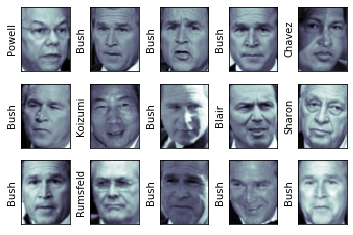

In [4]:
plot_images(faces.images)

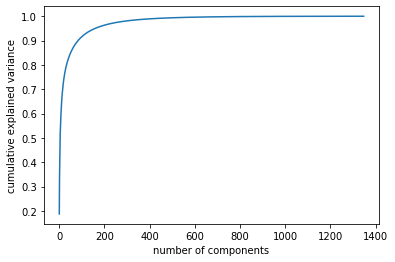

In [47]:
pca = PCA().fit(faces.data)
plotter.plot(np.cumsum(pca.explained_variance_ratio_))
plotter.xlabel('number of components')
plotter.ylabel('cumulative explained variance');

In [6]:
parameters = {'svc__C' : [1,2,2.5,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,50,60,80,90,100], 
              'svc__gamma' : [0.0001, 0.00031, 0.00041 , 0.0005, 0.001, 0.003, 0.0031, 0.005]}

In [61]:
def opt_pca(n_comp, parameters):
    pca = PCA(n_components= n_comp, random_state=2022, whiten=True, svd_solver="randomized")
    svc = SVC(kernel='rbf', class_weight='balanced', shrinking=False)
    model = make_pipeline(pca, svc)
    clf = GridSearchCV(model, parameters, n_jobs=10)
    clf.fit(X_train, y_train)
    model = clf.best_estimator_
    prediction_model = model.predict(X_test)
    accuracy1 = round(accuracy_score(y_test,prediction_model), 3)
    print(n_comp," components: ", accuracy1)
    return(accuracy1, model)

In [62]:
#iterating around the number of components for which we obtained the best result to check the number
#of components for which the model has the highest accuracy

#using the opt_pca() function we interated from 10-300 PCA components every 10 and determined the best range to be 
#between 140-160, followed by local optimization around 150 values seen in the blot below

accuracy = {}
accuracy_trend = []
for i in range(144, 155, 1):
    accuracy_val, params = opt_pca(i, parameters)
    accuracy.update({accuracy_val:params})
    accuracy_trend.append(accuracy_val)

# the model with 147 components has the best accuracy and will be saved as the best model 

144  components:  0.941
145  components:  0.926
146  components:  0.941
147  components:  0.956
148  components:  0.941
149  components:  0.926
150  components:  0.941
151  components:  0.941
152  components:  0.941
153  components:  0.926
154  components:  0.941


In [63]:
best_accuracy = max(accuracy.keys())
best_model = accuracy[best_accuracy]
best_model 

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=147,
                     random_state=2022, svd_solver='randomized', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=2, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.0031,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=False, tol=0.001,
                     verbose=False))],
         verbose=False)

Text(0, 0.5, 'Accuracy')

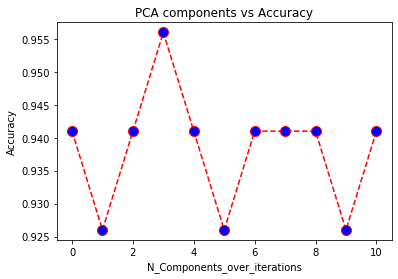

In [64]:
plotter.figure(figsize=(6, 4))
plotter.plot(range(len(accuracy_trend)), accuracy_trend, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plotter.title('PCA components vs Accuracy')
plotter.xlabel('N_Components_over_iterations')
plotter.ylabel('Accuracy')

In [65]:
prediction_model = best_model.predict(X_test)

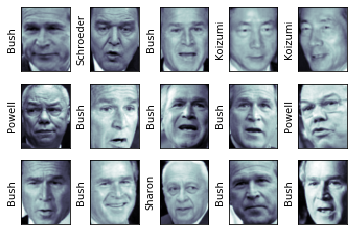

In [66]:
def plot_results(data, y_test):
    fig, ax = plotter.subplots(3, 5)
    for i, axi in enumerate(ax.flat):
        axi.imshow(data[i].reshape(62,47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        if y_test[i] == prediction_model[i]:
            axi.set_ylabel(faces.target_names[prediction_model[i]].split()[-1], color = "black")
        else:
            axi.set_ylabel(faces.target_names[prediction_model[i]].split()[-1], color = "red")
plot_results(X_test, y_test)


In [67]:
print("Predicting people's names on the test set")
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       0.80      1.00      0.89         4
     Colin Powell       1.00      1.00      1.00         7
  Donald Rumsfeld       1.00      1.00      1.00         7
    George W Bush       1.00      1.00      1.00        27
Gerhard Schroeder       1.00      0.75      0.86         4
      Hugo Chavez       1.00      0.60      0.75         5
Junichiro Koizumi       1.00      1.00      1.00         5
       Tony Blair       0.82      1.00      0.90         9

         accuracy                           0.96        68
        macro avg       0.95      0.92      0.92        68
     weighted avg       0.96      0.96      0.95        68



In [68]:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[ 4,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  7,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9]], dtype=int64)